In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=EJ*np.kron(cos_theta,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [4]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=20
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

# For calculations ng

ng1=np.arange(0.495,0.5051,0.001)
ng2=np.arange(0.495,0.5051,0.001)
print(r"(1%) \epsilon_n = ",0.005)
epsilon_n=0.005
print(ng1)

# For calculations phiext
a=np.pi-(np.pi*0.01)
b=np.pi+(np.pi*0.01 + 0.001)
phi_ext1=np.arange(a,b,(0.01*np.pi)*2/10)
phi_ext2=np.arange(a,b,(0.01*np.pi)*2/10)
print(r"(1%) \epsilon_{\varphi} = ",(0.01*np.pi))
epsilon_phi=(0.01*np.pi)
print(phi_ext1)


#2Darrays

PHI,NG=np.meshgrid(phi_ext1,ng1)
print(NG.shape[0])
print(NG.shape[1])
print(NG)
print(PHI)

Energies1_0=np.zeros_like(NG)
Energies1_1=np.zeros_like(NG)

Energies2_0=np.zeros_like(NG)
Energies2_1=np.zeros_like(NG)

(1%) \epsilon_n =  0.005
[0.495 0.496 0.497 0.498 0.499 0.5   0.501 0.502 0.503 0.504 0.505]
(1%) \epsilon_{\varphi} =  0.031415926535897934
[3.11017673 3.11645991 3.1227431  3.12902628 3.13530947 3.14159265
 3.14787584 3.15415902 3.16044221 3.16672539 3.17300858]
11
11
[[0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495]
 [0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496]
 [0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497]
 [0.498 0.498 0.498 0.498 0.498 0.498 0.498 0.498 0.498 0.498 0.498]
 [0.499 0.499 0.499 0.499 0.499 0.499 0.499 0.499 0.499 0.499 0.499]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501]
 [0.502 0.502 0.502 0.502 0.502 0.502 0.502 0.502 0.502 0.502 0.502]
 [0.503 0.503 0.503 0.503 0.503 0.503 0.503 0.503 0.503 0.503 0.503]
 [0.504 0.504 0.504 0.504 0.504 0.504 0.504 0.504 0.504 0.504 0.504]
 [0.505 0.505 0.505 0.505 0.505 0.505 0

In [5]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("i=",i)
        print("j=",j)
        print("Step for ng = ",ng1[i],", phi_ext= ",phi_ext1[j])
        H1=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,ng1[i],phi_ext1[j],alpha)
        print("Hamiltonian built, len(H)=",len(H1)**2)
        #vals,vects=np.linalg.eigh(H)
        vals, _ = eigsh(H1, k=2, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals[0],vals[1])
        print("Eigenvalues calculated")
        Energies1_0[i][j]+=vals[0]
        print("Energies1_0[",i,"][",j,"] = ",Energies1_0[i][j])
        Energies1_1[i][j]+=vals[1]
        print("Energies1_1[",i,"][",j,"] = ",Energies1_1[i][j])

i= 0
j= 0
Step for ng =  0.495 , phi_ext=  3.1101767270538954
Hamiltonian built, len(H)= 741321
1.752917062297908 1.7910895732549974
Eigenvalues calculated
Energies1_0[ 0 ][ 0 ] =  1.752917062297908
Energies1_1[ 0 ][ 0 ] =  1.7910895732549974
i= 0
j= 1
Step for ng =  0.495 , phi_ext=  3.116459912361075
Hamiltonian built, len(H)= 741321
1.7536493498610197 1.790339432253458
Eigenvalues calculated
Energies1_0[ 0 ][ 1 ] =  1.7536493498610197
Energies1_1[ 0 ][ 1 ] =  1.790339432253458
i= 0
j= 2
Step for ng =  0.495 , phi_ext=  3.1227430976682546
Hamiltonian built, len(H)= 741321
1.7542403170449918 1.789734578614507
Eigenvalues calculated
Energies1_0[ 0 ][ 2 ] =  1.7542403170449918
Energies1_1[ 0 ][ 2 ] =  1.789734578614507
i= 0
j= 3
Step for ng =  0.495 , phi_ext=  3.1290262829754343
Hamiltonian built, len(H)= 741321
1.754675089577786 1.7892898869461524
Eigenvalues calculated
Energies1_0[ 0 ][ 3 ] =  1.754675089577786
Energies1_1[ 0 ][ 3 ] =  1.7892898869461524
i= 0
j= 4
Step for ng =  0.49

In [6]:
print(Energies1_0)

[[1.75291706 1.75364935 1.75424032 1.75467509 1.7549414  1.75503113
  1.7549414  1.75467509 1.75424032 1.75364935 1.75291706]
 [1.75583438 1.75670839 1.7574252  1.7579601  1.75829128 1.7584035
  1.75829128 1.7579601  1.7574252  1.75670839 1.75583438]
 [1.75853959 1.75960624 1.76050553 1.76119453 1.76163031 1.76177978
  1.76163031 1.76119453 1.76050553 1.75960624 1.75853959]
 [1.76087265 1.76219405 1.7633632  1.76430846 1.76493725 1.76515992
  1.76493725 1.76430846 1.7633632  1.76219405 1.76087265]
 [1.76254839 1.7641515  1.76567897 1.76705698 1.76811717 1.76854389
  1.76811717 1.76705698 1.76567897 1.7641515  1.76254839]
 [1.76317825 1.7649249  1.76667357 1.76842426 1.77017695 1.77193164
  1.77017695 1.76842426 1.76667357 1.7649249  1.76317825]
 [1.76254839 1.7641515  1.76567897 1.76705698 1.76811717 1.76854389
  1.76811717 1.76705698 1.76567897 1.7641515  1.76254839]
 [1.76087265 1.76219405 1.7633632  1.76430846 1.76493725 1.76515992
  1.76493725 1.76430846 1.7633632  1.76219405 1.760

In [7]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("Step for ng = ",ng2[i],", phi_ext= ",phi_ext2[j])
        H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng2[i],phi_ext2[j],alpha2)
        print("Hamiltonian built, len(H)=",len(H2)**2)
        #vals,vects=np.linalg.eigh(H)
        vals2, _ = eigsh(H2, k=2, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals2[0],vals2[1])
        print("Eigenvalues calculated")
        Energies2_0[i][j]+=vals2[0]
        print("Energies2_0[",i,"][",j,"] = ",Energies2_0[i][j])
        Energies2_1[i][j]+=vals2[1]
        print("Energies2_1[",i,"][",j,"] = ",Energies2_1[i][j])

Step for ng =  0.495 , phi_ext=  3.1101767270538954
Hamiltonian built, len(H)= 741321
0.27406839819853096 0.2761992762224983
Eigenvalues calculated
Energies2_0[ 0 ][ 0 ] =  0.27406839819853096
Energies2_1[ 0 ][ 0 ] =  0.2761992762224983
Step for ng =  0.495 , phi_ext=  3.116459912361075
Hamiltonian built, len(H)= 741321
0.2740996635772033 0.27616756534382964
Eigenvalues calculated
Energies2_0[ 0 ][ 1 ] =  0.2740996635772033
Energies2_1[ 0 ][ 1 ] =  0.27616756534382964
Step for ng =  0.495 , phi_ext=  3.1227430976682546
Hamiltonian built, len(H)= 741321
0.27412466162266363 0.2761422207802211
Eigenvalues calculated
Energies2_0[ 0 ][ 2 ] =  0.27412466162266363
Energies2_1[ 0 ][ 2 ] =  0.2761422207802211
Step for ng =  0.495 , phi_ext=  3.1290262829754343
Hamiltonian built, len(H)= 741321
0.27414290964106997 0.27612372523907597
Eigenvalues calculated
Energies2_0[ 0 ][ 3 ] =  0.27414290964106997
Energies2_1[ 0 ][ 3 ] =  0.27612372523907597
Step for ng =  0.495 , phi_ext=  3.135309468282614


In [8]:
print(Energies2_0)

[[0.2740684  0.27409966 0.27412466 0.27414291 0.27415402 0.27415776
  0.27415402 0.27414291 0.27412466 0.27409966 0.2740684 ]
 [0.27424182 0.27427953 0.27431008 0.27433261 0.27434645 0.27435112
  0.27434645 0.27433261 0.27431008 0.27427953 0.27424182]
 [0.27440538 0.27445225 0.2744911  0.27452038 0.27453865 0.27454487
  0.27453865 0.27452038 0.2744911  0.27445225 0.27440538]
 [0.27455026 0.27461019 0.27466212 0.27470311 0.27472972 0.274739
  0.27472972 0.27470311 0.27466212 0.27461019 0.27455026]
 [0.27465839 0.27473456 0.27480608 0.27486901 0.27491554 0.27493351
  0.27491554 0.27486901 0.27480608 0.27473456 0.27465839]
 [0.27470052 0.27478599 0.27487152 0.2749571  0.27504273 0.27512841
  0.27504273 0.2749571  0.27487152 0.27478599 0.27470052]
 [0.27465839 0.27473456 0.27480608 0.27486901 0.27491554 0.27493351
  0.27491554 0.27486901 0.27480608 0.27473456 0.27465839]
 [0.27455026 0.27461019 0.27466212 0.27470311 0.27472972 0.274739
  0.27472972 0.27470311 0.27466212 0.27461019 0.274550

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (1)

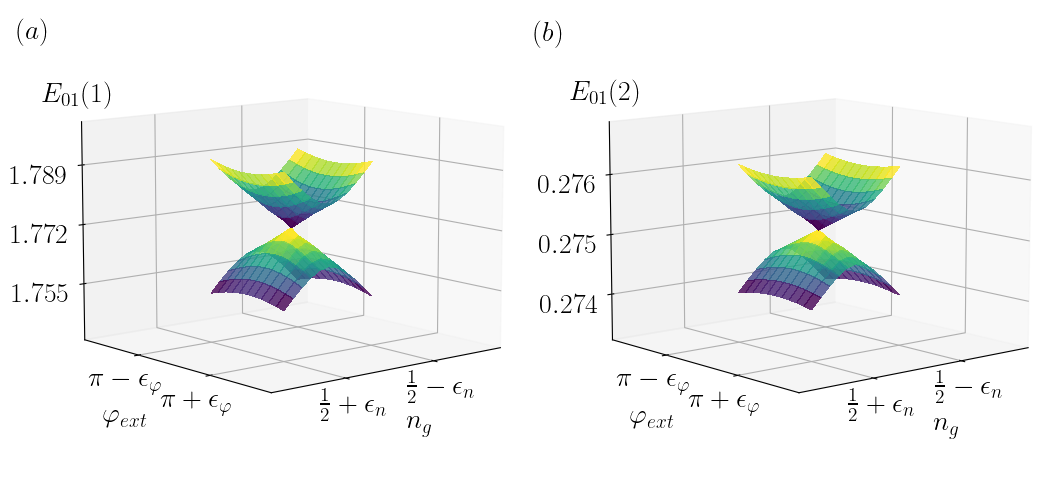

In [9]:
# Create the figure and subplots
fig = plt.figure(figsize=(13, 6))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(NG,PHI, Energies1_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies1_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.set_xlim(0.5-2.5*epsilon_n,0.5+2.5*epsilon_n)
ax1.set_ylim(np.pi-2.5*epsilon_phi,np.pi+2.5*epsilon_phi)
ax1.set_zlim(1.74,1.8)
ax1.text(0.5+3.5*epsilon_n,np.pi-2.5*epsilon_phi,1.808,r'$E_{01} (1)$', fontsize=20)
ax1.text(0.5,np.pi+3*epsilon_phi,1.7233,r'$n_g$', fontsize=20)
ax1.text(0.5+4.1*epsilon_n,np.pi,1.7265,r'$\varphi_{ext}$', fontsize=20)
ax1.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax1.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax1.set_zticks([1.755,1.772,1.789],['$1.755$','$1.772$','$1.789$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=10.0)
ax1.text(0.5+4*epsilon_n,np.pi-2.5*epsilon_phi,1.826,r'$(a)$', fontsize=20)
#ax1.scatter([0.5],[np.pi+0.17],[1.730], color='red')
ax1.view_init(10, 50)

# Plot 1: 3D surface plot
ax2 = fig.add_subplot(122, projection='3d')
surff1 = ax2.plot_surface(NG,PHI,Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surff2 = ax2.plot_surface(NG,PHI, Energies2_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax2.set_xlabel('$n_g$')
#ax2.set_ylabel(r'$\varphi_{ext}$')
#ax2.set_zlabel('$E_{01} (1)$')
ax2.set_xlim(0.5-2.5*epsilon_n,0.5+2.5*epsilon_n)
ax2.set_ylim(np.pi-2.5*epsilon_phi,np.pi+2.5*epsilon_phi)
ax2.set_zlim(0.2733,0.2768)
ax2.text(0.5+3.5*epsilon_n,np.pi-2.5*epsilon_phi,0.2773,r'$E_{01} (2)$', fontsize=20)
ax2.text(0.5,np.pi+3*epsilon_phi,0.2723,r'$n_g$', fontsize=20)
ax2.text(0.5+4.1*epsilon_n,np.pi,0.2725,r'$\varphi_{ext}$', fontsize=20)
ax2.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax2.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax2.set_zticks([0.274,0.275,0.276],['$0.274$','$0.275$','$0.276$'])
ax2.tick_params(axis='x', pad=-2.0)
ax2.tick_params(axis='y', pad=2.0)
ax2.tick_params(axis='z', pad=10.0)
ax2.text(0.5+4.2*epsilon_n,np.pi-2.5*epsilon_phi,0.2783,r'$(b)$', fontsize=20)
ax2.view_init(10, 50)

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.1)

# Show the figure
#plt.savefig('E01_1&2_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (2)

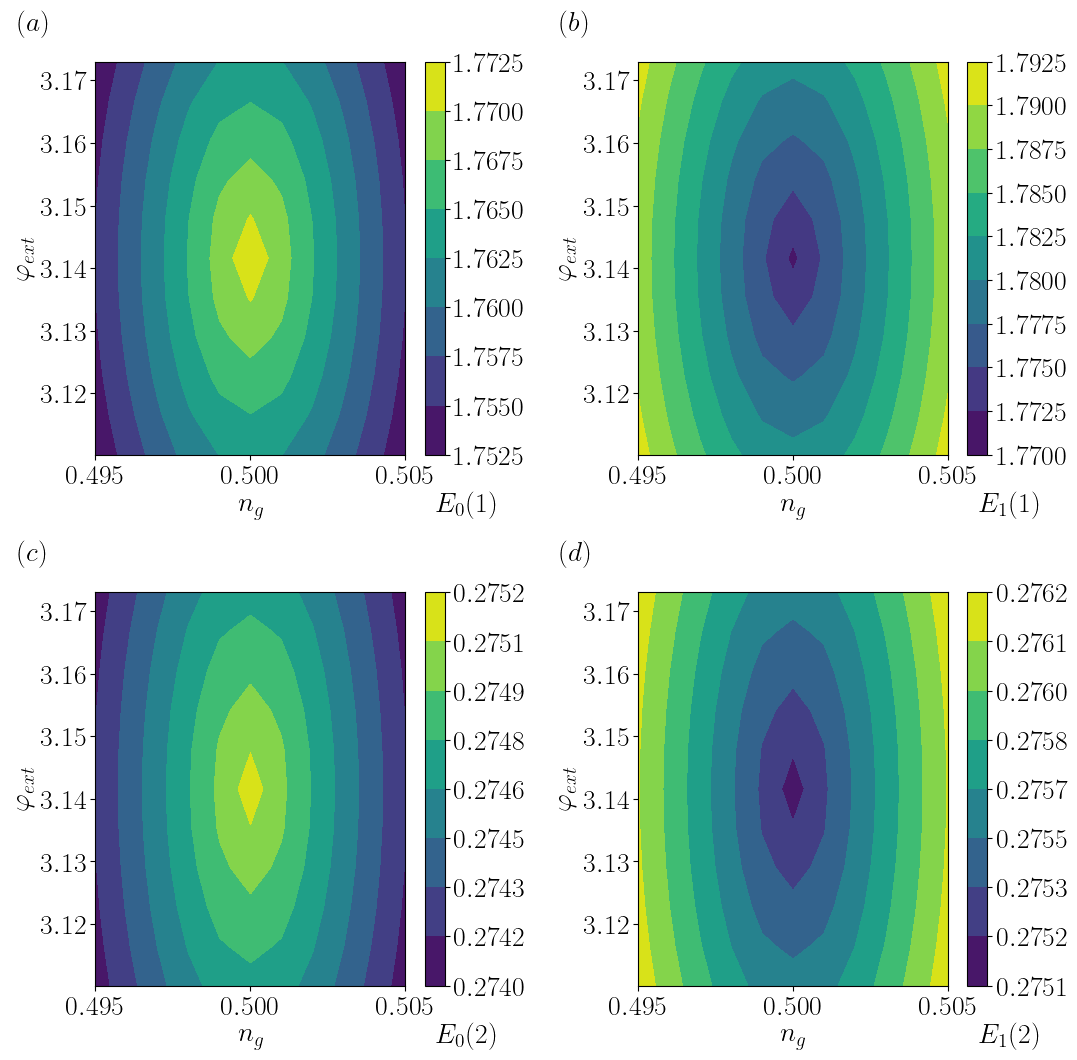

In [10]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 12))

# Plot 2: First contour plot
ax21 = fig.add_subplot(221)
contour1 = ax21.contourf(NG,PHI, Energies1_0, cmap="viridis")
plt.axis('tight')
ax21.set_xlabel(r'$n_g$')
ax21.set_ylabel(r'$\varphi_{ext}$')
ax21.text(0.506,3.101,r'$E_0 (1)$', fontsize=20)
ax21.text(0.4925,3.178,r'$(a)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax21)
#colorbar1.set_label('$E_0 (1)$')
colorbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Plot 3: Second contour plot
ax31 = fig.add_subplot(222)
contour2 = ax31.contourf(NG, PHI, Energies1_1, cmap="viridis")
plt.axis('tight')
ax31.set_xlabel('$n_g$')
ax31.set_ylabel(r'$\varphi_{ext}$')
ax31.text(0.506,3.101,r'$E_1 (1)$', fontsize=20)
ax31.text(0.4925,3.178,r'$(b)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax31)
#colorbar2.set_label('$E_1 (1)$')
colorbar2.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Plot 2: First contour plot
ax22 = fig.add_subplot(223)
contour3 = ax22.contourf(NG, PHI, Energies2_0, cmap="viridis")
plt.axis('tight')
ax22.set_xlabel(r'$n_g$')
ax22.set_ylabel(r'$\varphi_{ext}$')
ax22.text(0.506,3.101,r'$E_0 (2)$', fontsize=20)
ax22.text(0.4925,3.178,r'$(c)$', fontsize=20)
colorbar3 = plt.colorbar(contour3, ax=ax22)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar3.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

#colorbar1.set_label('$E_0 (2)$')

# Plot 3: Second contour plot
ax32 = fig.add_subplot(224)
contour4 = ax32.contourf(NG, PHI, Energies2_1, cmap="viridis")
plt.axis('tight')
ax32.set_xlabel('$n_g$')
ax32.set_ylabel(r'$\varphi_{ext}$')
ax32.text(0.506,3.101,r'$E_1 (2)$', fontsize=20)
ax32.text(0.4925,3.178,r'$(d)$', fontsize=20)
colorbar4 = plt.colorbar(contour4, ax=ax32)
#colorbar2.set_label('$E_1 (2)$')
colorbar4.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.4,hspace=0.35)

# Show the figure
#plt.savefig('E01_1&2_CMAP_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

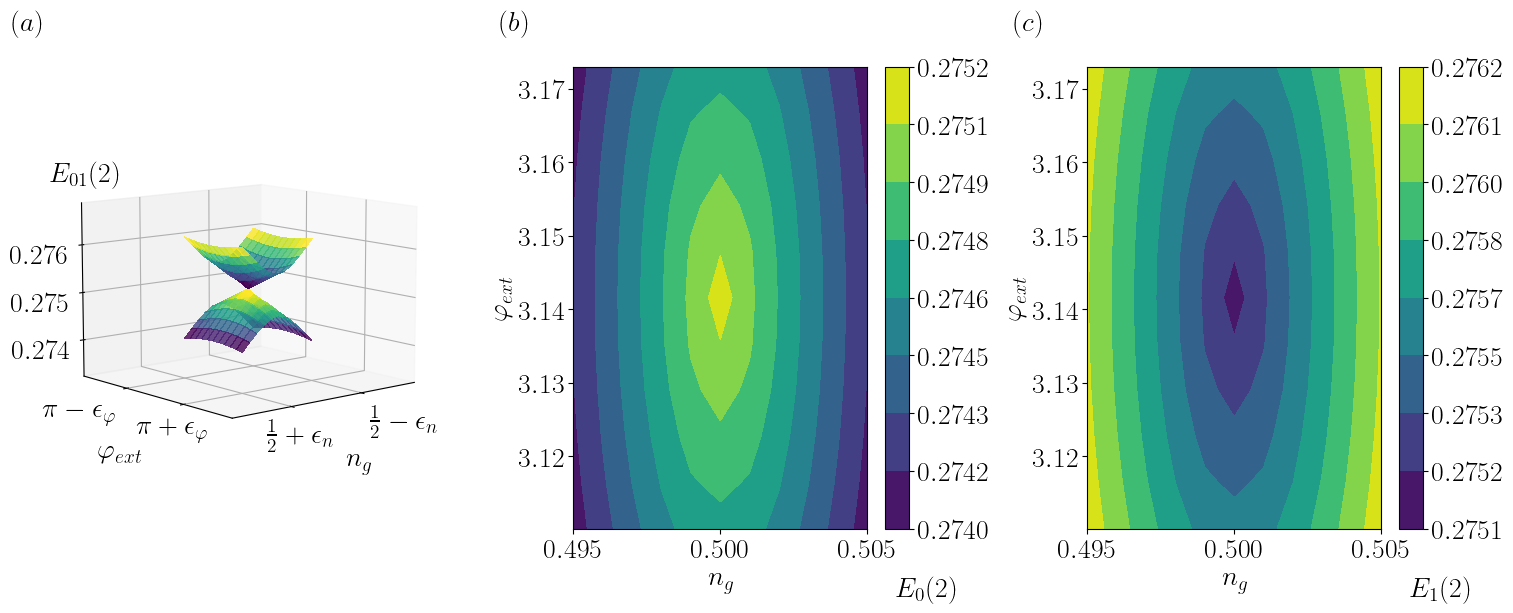

In [53]:
# Create the figure and subplots
fig = plt.figure(figsize=(18, 6))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surff1 = ax1.plot_surface(NG,PHI,Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surff2 = ax1.plot_surface(NG,PHI, Energies2_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax2.set_xlabel('$n_g$')
#ax2.set_ylabel(r'$\varphi_{ext}$')
#ax2.set_zlabel('$E_{01} (1)$')
ax1.set_xlim(0.5-2.5*epsilon_n,0.5+2.5*epsilon_n)
ax1.set_ylim(np.pi-2.5*epsilon_phi,np.pi+2.5*epsilon_phi)
ax1.set_zlim(0.2733,0.2768)
ax1.text(0.5+3.5*epsilon_n,np.pi-2.5*epsilon_phi,0.2774,r'$E_{01} (2)$', fontsize=20)
ax1.text(0.499,np.pi+3*epsilon_phi,0.2719,r'$n_g$', fontsize=20)
ax1.text(0.5+4.1*epsilon_n,np.pi,0.2722,r'$\varphi_{ext}$', fontsize=20)
ax1.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax1.get_xticklabels()[0].set_ha('left')
ax1.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax1.get_yticklabels()[0].set_ha('right')
ax1.set_zticks([0.274,0.275,0.276],['$0.274$','$0.275$','$0.276$'])
ax1.tick_params(axis='x', pad=-1.0)
ax1.tick_params(axis='y', pad=0.0)
ax1.tick_params(axis='z', pad=10.0)
ax1.text(0.5+4.4*epsilon_n,np.pi-2.5*epsilon_phi,0.28045,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax22 = fig.add_subplot(132)
contour3 = ax22.contourf(NG, PHI, Energies2_0, cmap="viridis")
plt.axis('tight')
ax22.set_xlabel(r'$n_g$')
ax22.set_ylabel(r'$\varphi_{ext}$')
ax22.text(0.506,3.101,r'$E_0 (2)$', fontsize=20)
ax22.text(0.4925,3.178,r'$(b)$', fontsize=20)
colorbar3 = plt.colorbar(contour3, ax=ax22)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar3.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

#colorbar1.set_label('$E_0 (2)$')

# Plot 3: Second contour plot
ax32 = fig.add_subplot(133)
contour4 = ax32.contourf(NG, PHI, Energies2_1, cmap="viridis")
plt.axis('tight')
ax32.set_xlabel('$n_g$')
ax32.set_ylabel(r'$\varphi_{ext}$')
ax32.text(0.506,3.101,r'$E_1 (2)$', fontsize=20)
ax32.text(0.4925,3.178,r'$(c)$', fontsize=20)
colorbar4 = plt.colorbar(contour4, ax=ax32)
#colorbar2.set_label('$E_1 (2)$')
colorbar4.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.4)

# Show the figure
#plt.savefig('E01_1&2_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()